In [3]:
# raw data on April 1, 2022 from 16:10 to 16:40 UTC. Launch from SLC40 at 16:24 UTC, watched from Titusville
import os, sys, glob, obspy
import numpy as np

In [14]:
# Load data
SeismicEventDir = '../SeismoAcousticData/Events/20220504'
whatisthere = glob.glob(os.path.join(SeismicEventDir, '*'))
seedfiles = []
for item in whatisthere:
    if os.path.isdir(item):
        newseedfiles = glob.glob(os.path.join(item, '*seed'))
        if newseedfiles:
            seedfiles.extend(newseedfiles)
    elif os.path.isfile(item):
        if 'seed' in item:
            seedfiles.append(item)

st = obspy.Stream()
for seedfile in seedfiles:
    this_st = obspy.read(seedfile)
    this_st.merge()
    for tr in this_st:
        st.append(tr)
        

30 Trace(s) in Stream:

FL.S39A2.00.HHE | 2022-04-27T21:24:00.000000Z - 2022-04-27T21:28:59.990000Z | 100.0 Hz, 30000 samples
...
(28 other traces)
...
FL.BCHH3.10.HDF | 2022-04-27T21:24:00.000000Z - 2022-04-27T21:28:59.990000Z | 100.0 Hz, 30000 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]


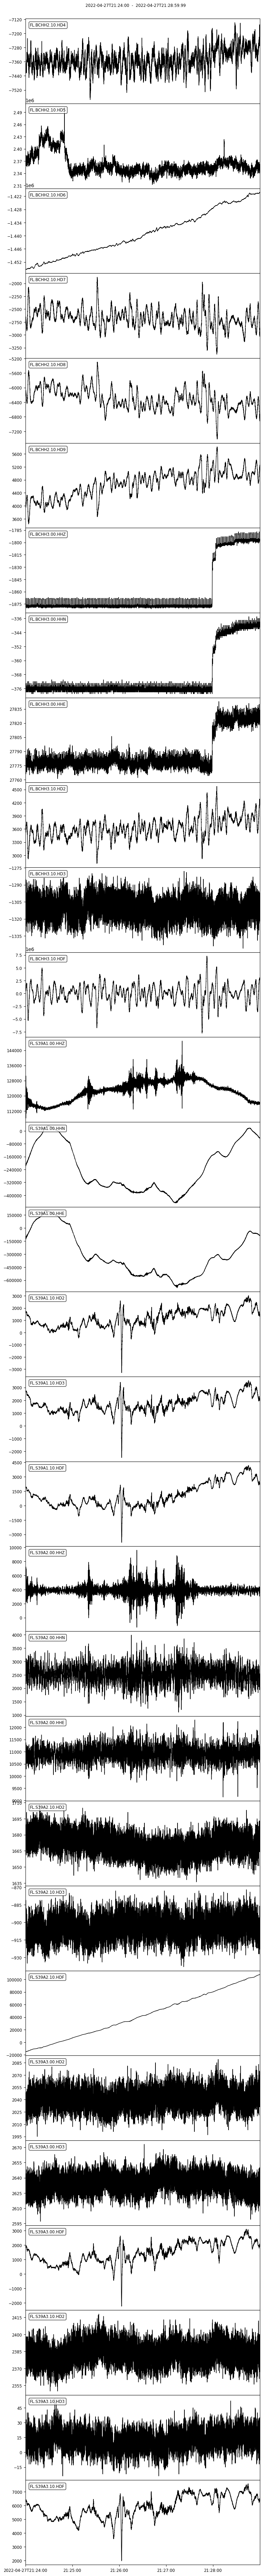

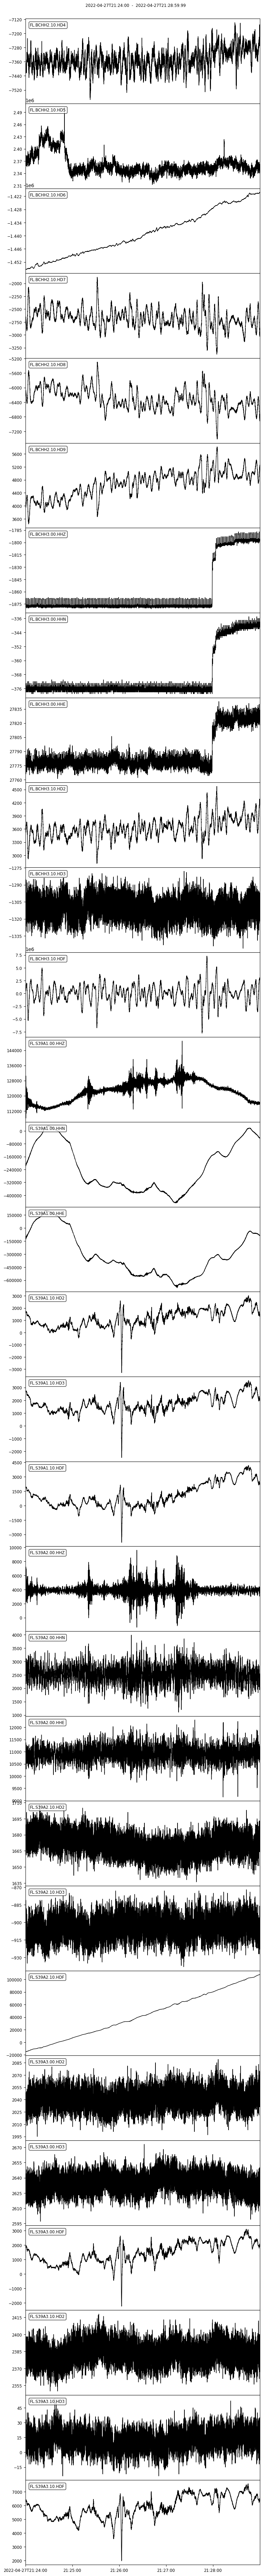

In [15]:
# Summarize data
print(st)
st.plot(equal_scale=False)        

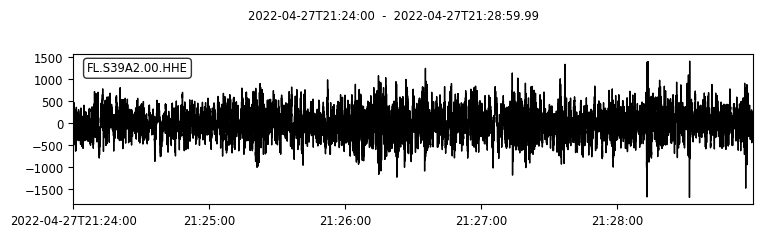

include?n


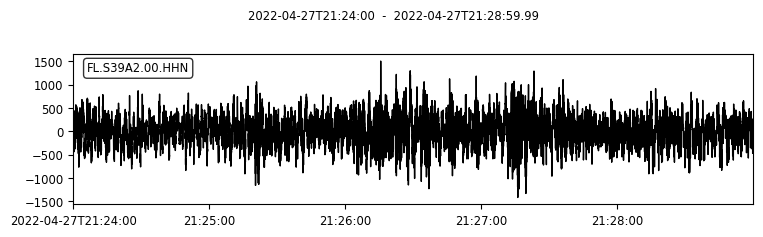

include?n


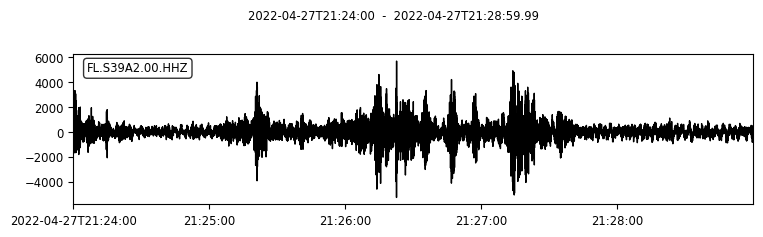

include?y


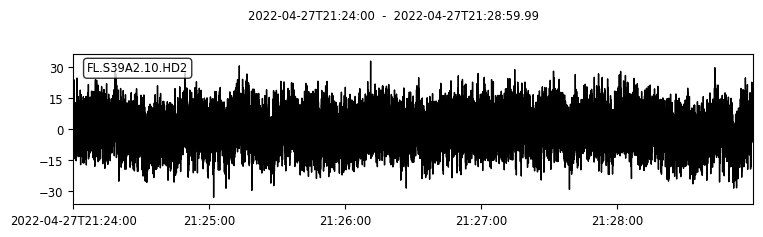

include?n


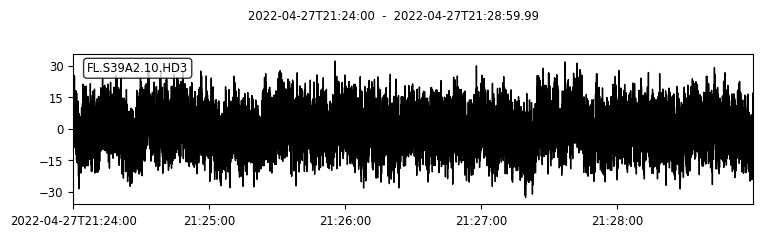

include?n


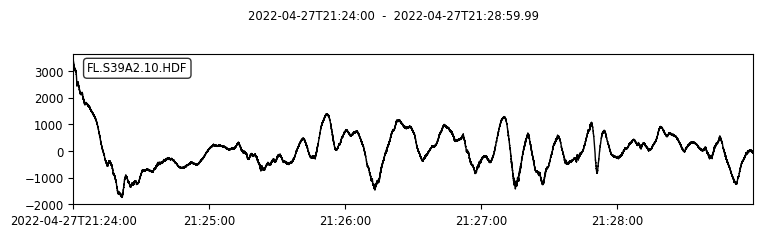

include?n


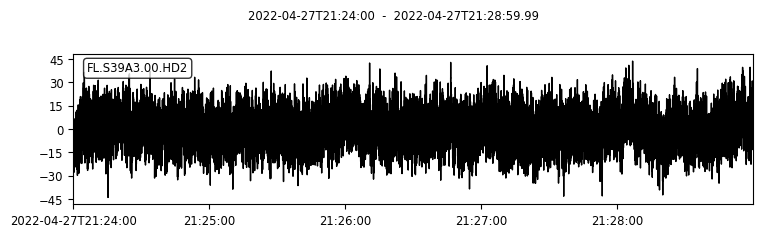

include?n


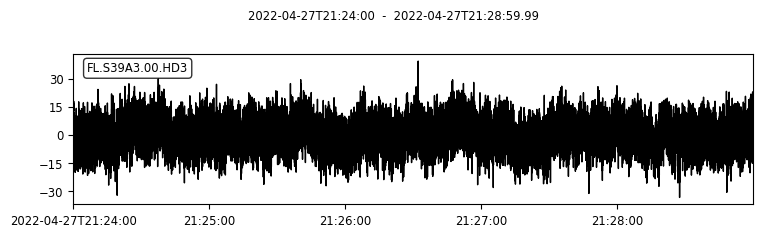

include?n


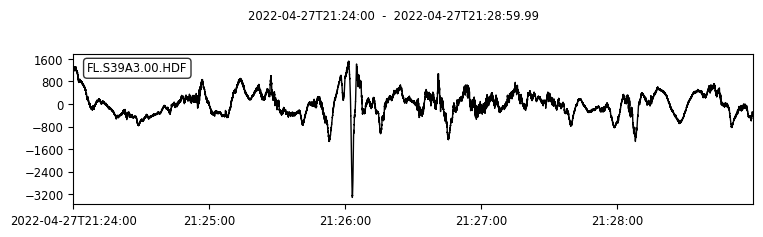

include?n


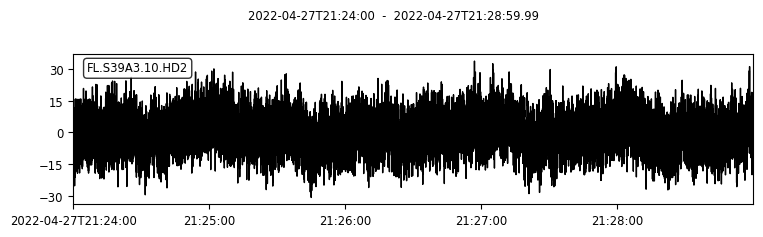

include?n


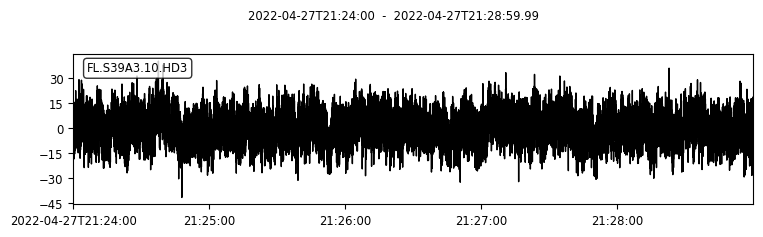

include?n


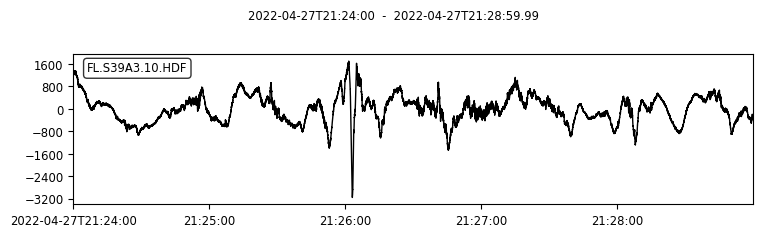

include?n


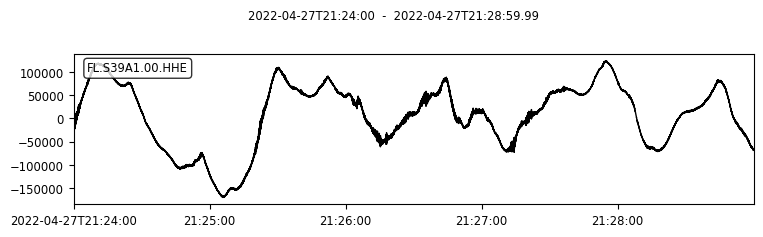

include?n


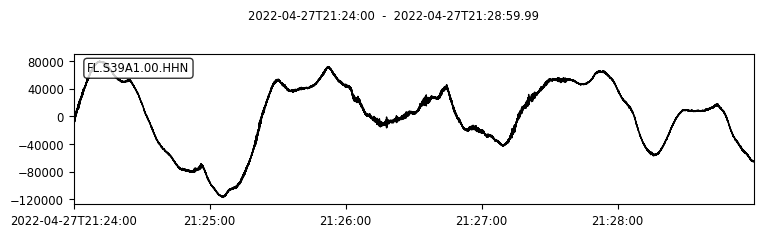

include?n


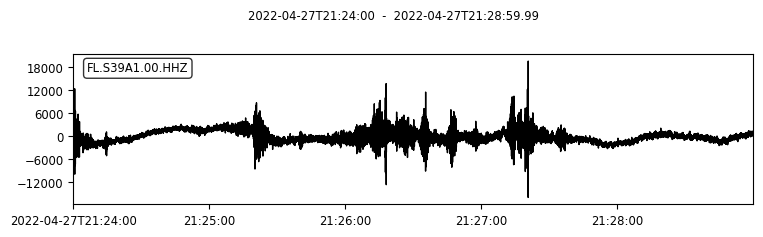

include?n


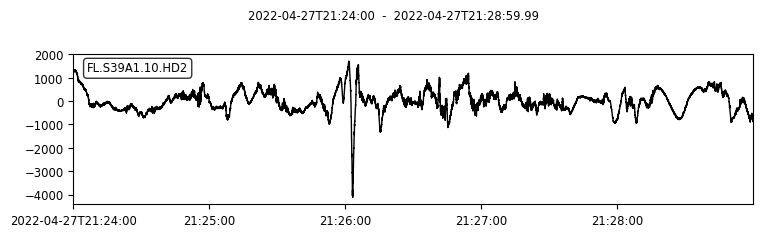

include?n


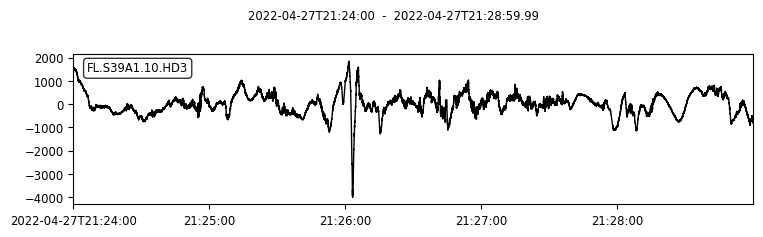

include?n


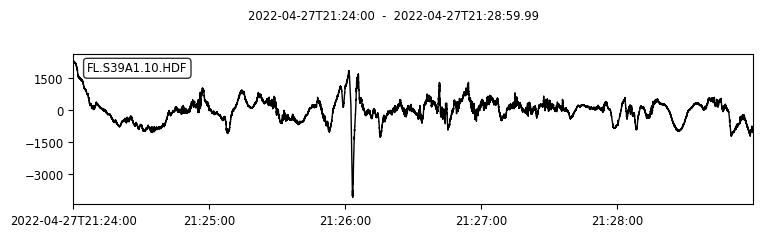

include?n


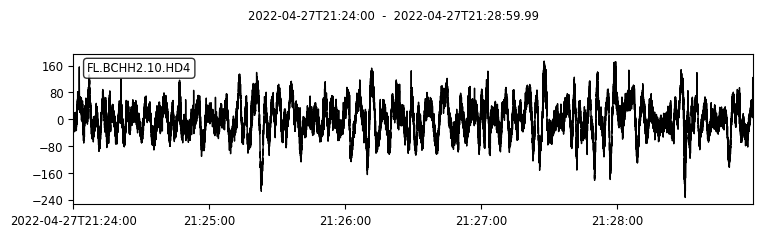

include?n


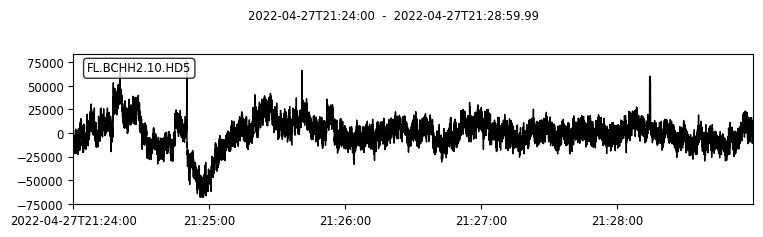

include?n


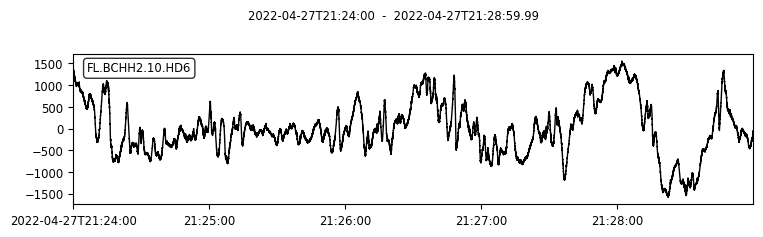

include?n


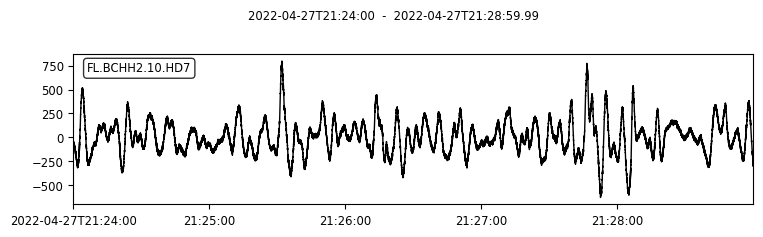

include?n


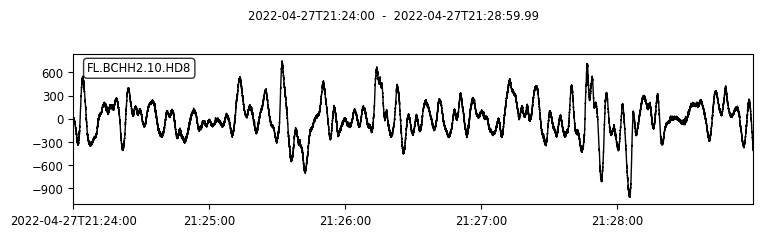

include?n


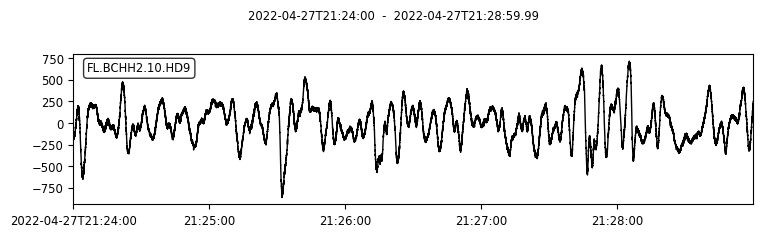

include?n


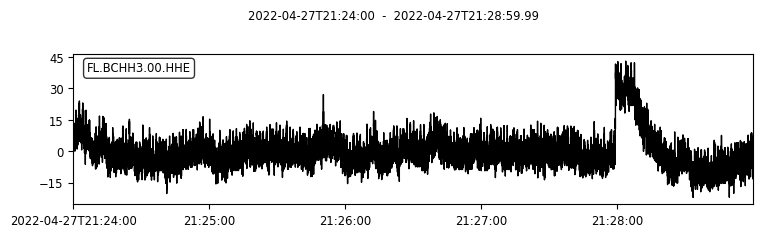

include?n


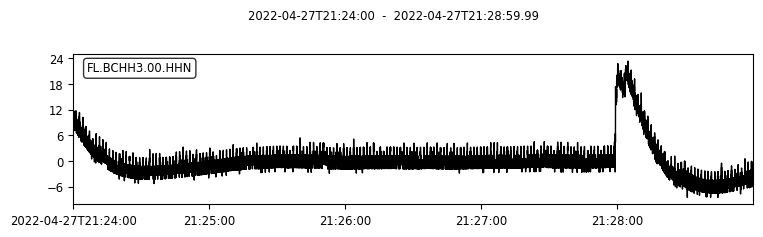

include?n


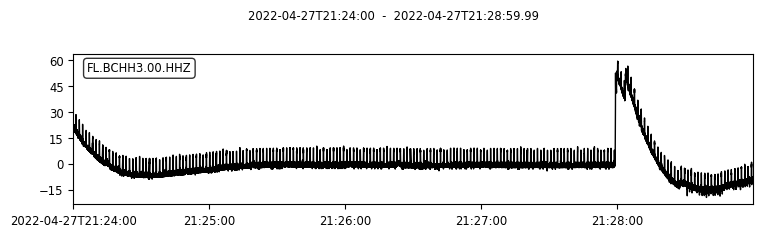

include?n


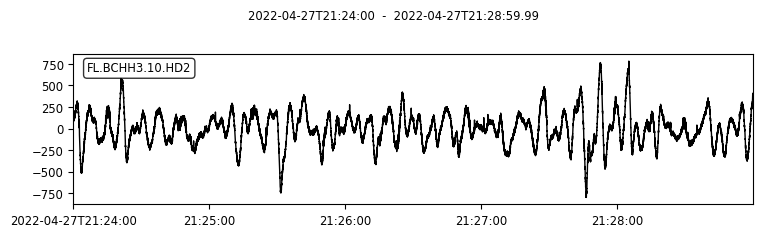

include?n


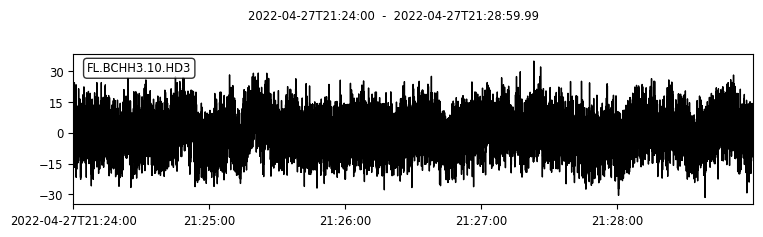

include?n


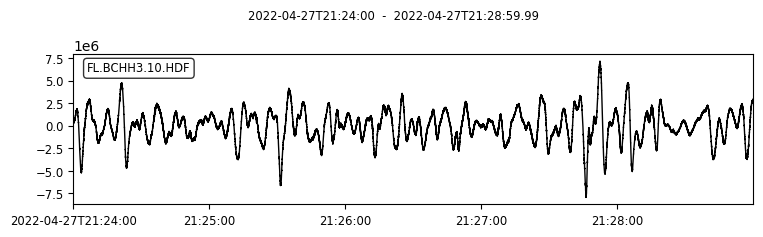

include?n


/Users/thompsong/miniconda3/envs/AAA/lib/python3.8/site-packages/obspy/io/mseed/core.py:790: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


In [16]:
straw = obspy.Stream()
for tr in st:
    tr.detrend('linear')
    tr.filter('highpass', freq=0.01, corners=2)
    tr.plot()
    yn = input('include?')
    if yn.lower() == 'y':
        straw.append(tr)
outfile = os.path.join(SeismicEventDir, 'event.mseed')
straw.write(outfile)

In [46]:
# calibration correction
stcorrected = straw.copy()
for tr in stcorrected:
    if 'countsPerUnit' in tr.stats:
        continue
    else:
        tr.stats['countsPerUnit'] = 0.0
        if tr.stats.channel[1]=='D':
            if tr.id == 'FL.BCHH3.10.HDF': # Chaparral M25. I had it set to 1 V FS. Should have used 40 V FS. 
                tr.stats.countsPerUnit = 8e5 # counts/Pa
            else:
                tr.stats.countsPerUnit = 720 # counts/Pa
            tr.stats.units = 'Pa'
        elif tr.stats.channel[1]=='H':
            tr.stats.countsPerUnit = 3e8 # counts/(m/s)
            tr.stats.units = 'm/s'
        #print(tr.stats.countsPerUnit)
        tr.data = tr.data/tr.stats.countsPerUnit
        

720
800000.0
720
720
720
720
720
720
300000000.0
300000000.0
720
300000000.0
300000000.0
720
300000000.0
300000000.0
720
720
720


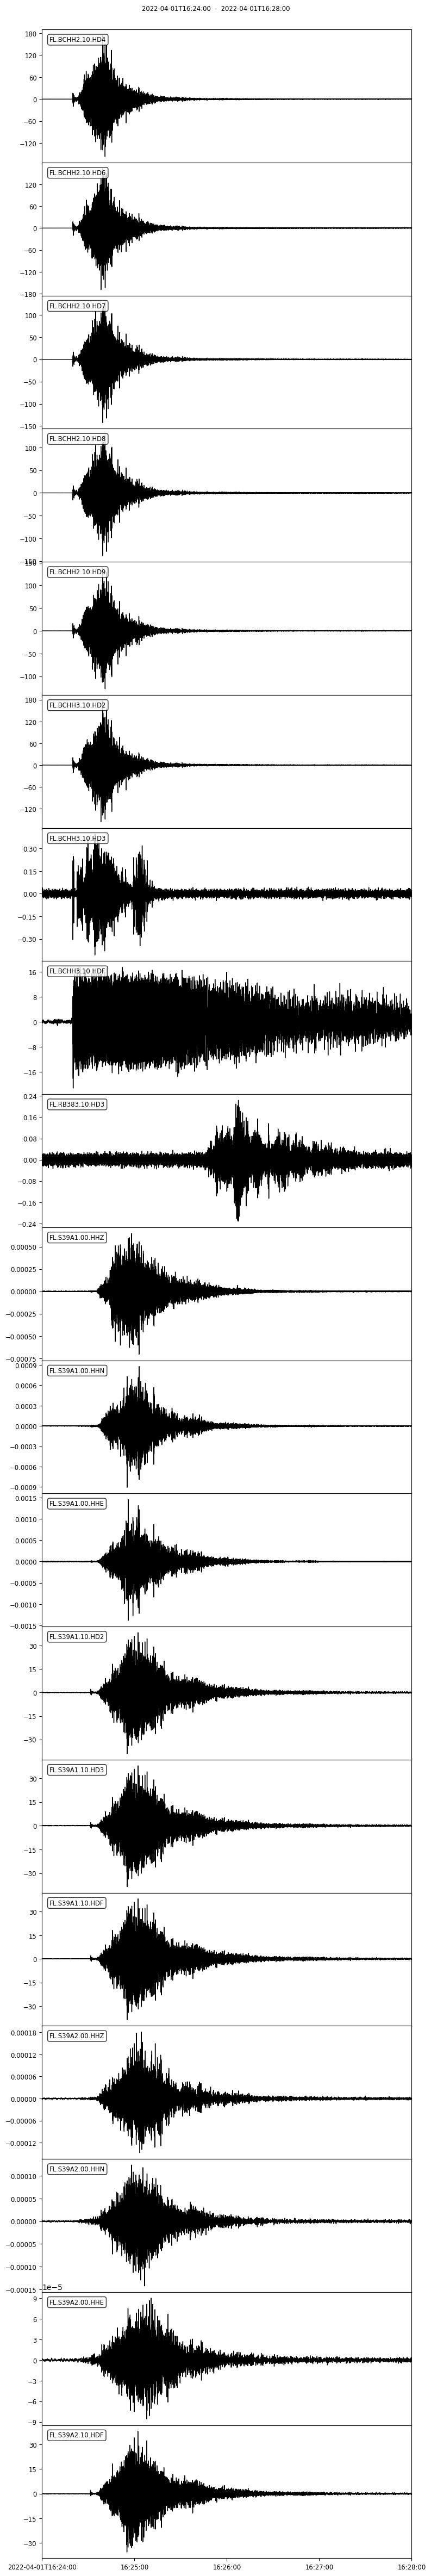

In [47]:
stfiltered = stcorrected.copy()
stfiltered.filter('highpass', freq=0.5, corners=2)
stfiltered.plot(starttime=obspy.UTCDateTime(2022,4,1,16,24,0), endtime=obspy.UTCDateTime(2022,4,1,16,28,0),  equal_scale=False);

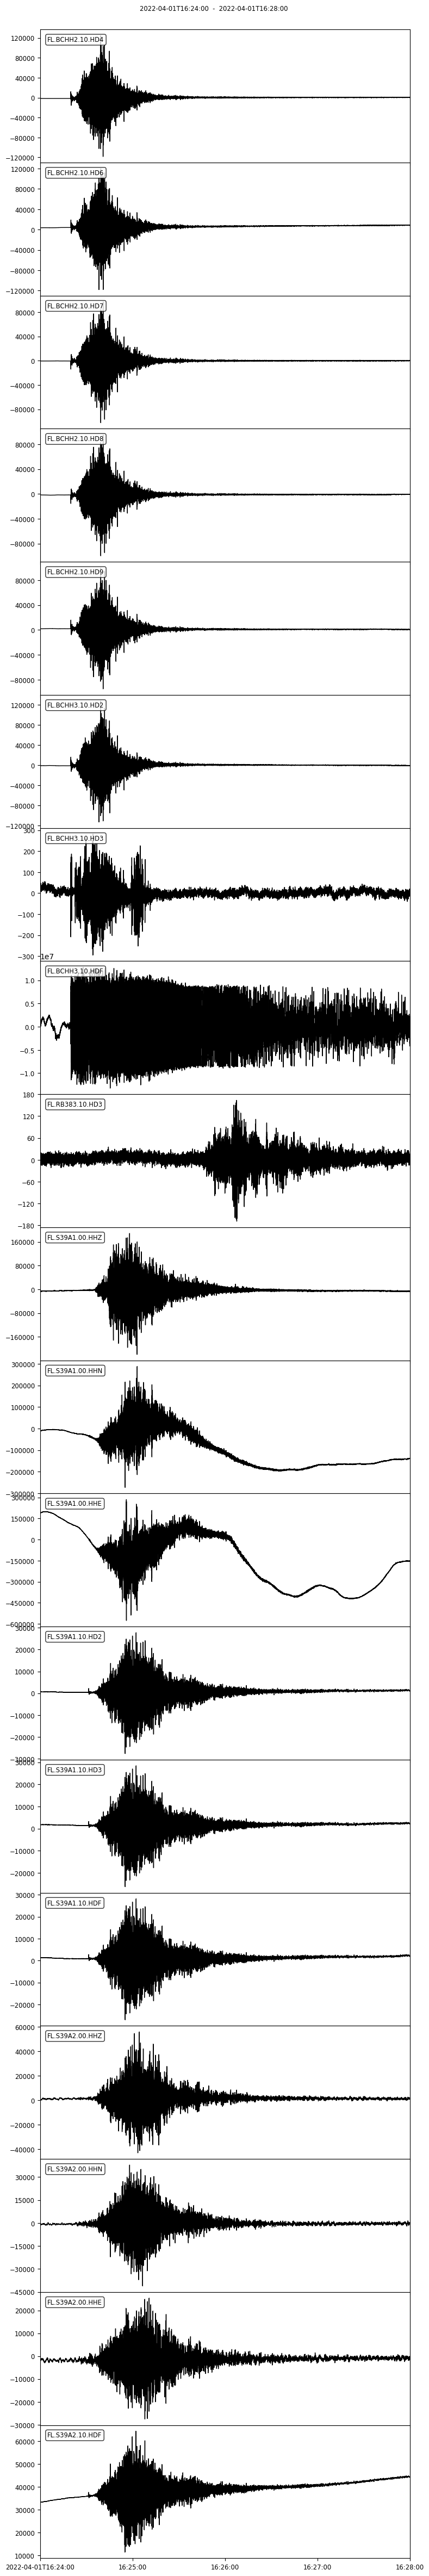

In [45]:
straw.plot(starttime=obspy.UTCDateTime(2022,4,1,16,24,0), endtime=obspy.UTCDateTime(2022,4,1,16,28,0),  equal_scale=False);


In [ ]:
# it seems that when obspy plots a Stream object, it multiplies by the calib to recover the counts again. which we never want!